# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest


In [55]:
# read the data
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# split data into black and nonblack sounding names
dfblack = data[data.race=='b']
dfnonblack = data[data.race!='b']

# display some basic statistics
data.describe()



,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308860,0.496087,0.259654,0.275845,0.171676,0.278926,0.410143,0.442838,0.361775,0.371302
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


callbacks for black-sounding names 157.0
noncallbacks for black-sounding names 2278.0
callbacks for non black-sounding names 235.0
noncallbacks for non black-sounding names 2200.0


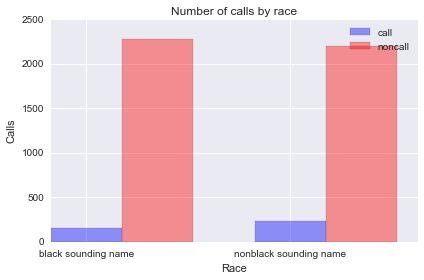

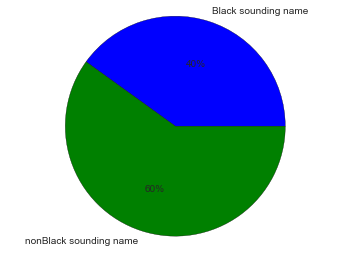

In [56]:
# count the number of blacks and nonblack sounding names and calls / noncalls
black_call=sum(dfblack.call)
black_nocall=len(dfblack)-black_call
nonblack_call=sum(dfnonblack.call)
nonblack_nocall=len(dfnonblack)-nonblack_call

# number of callbacks for black and non black-sounding names
print("callbacks for black-sounding names", black_call)
print("noncallbacks for black-sounding names", black_nocall)
print("callbacks for non black-sounding names", nonblack_call)
print("noncallbacks for non black-sounding names", nonblack_nocall)

#
# create bar chart
#
call = (black_call, nonblack_call)
noncall = (black_nocall, nonblack_nocall)
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, call, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='call')

rects2 = plt.bar(index + bar_width, noncall, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='noncall')

# put labels to bar chart
plt.xlabel('Race')
plt.ylabel('Calls')
plt.title('Number of calls by race')
plt.xticks(index + bar_width / 2, ('black sounding name', 'nonblack sounding name'))
plt.legend()
plt.tight_layout()

#
# create pie chart
#
labels = 'Black sounding name', 'nonBlack sounding name'
sizes = [black_call, nonblack_call]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%')
ax1.axis('equal')  

plt.show()


In [57]:
# measure the proportions
n1 = len(dfblack)
n2 = len(dfnonblack)
p1 = black_call / n1
p2 = nonblack_call / n2

count_call = np.array([black_call, nonblack_call])
nobs_array = np.array([n1, n2])
ls = .05
stat, pval = proportions_ztest(count=count_call, nobs=nobs_array, value=ls)

# standard error and confidence interval (CI)
se = np.sqrt(p1*(1-p1)/n1 + p1*(1-p2)/n2)
print('margin of error=', se)
print('conf interval=', (p1-p2-1.96*se, p1-p2+1.96*se))
print('p-value=', pval)

# print chi-square test 
chi_value = stats.chi2_contingency(np.array([[black_call, black_nocall],[nonblack_call, nonblack_nocall]]))
print('chi_sq p-value=', chi_value[1])

#t-test on education, ofjobs and yearsexp and occupspecific and occupbroad
print('education p-value=', stats.ttest_ind(dfblack['education'], dfnonblack['education'], equal_var = False)[1])
print('ofjobs p-value=', stats.ttest_ind(dfblack['ofjobs'], dfnonblack['ofjobs'], equal_var = False)[1])
print('yearsexp p-value=', stats.ttest_ind(dfblack['yearsexp'], dfnonblack['yearsexp'], equal_var = False)[1])
print('occupspecific p-value=', stats.ttest_ind(dfblack['occupspecific'], dfnonblack['occupspecific'], equal_var = False)[1])
print('occupbroad p-value=', stats.ttest_ind(dfblack['occupbroad'], dfnonblack['occupbroad'], equal_var = False)[1])
#proportion test on honors	volunteer	military	empholes  and workinschool
print('honors p-value=', proportions_ztest(count=np.array([sum(dfblack.honors), \
                                                           sum(dfnonblack.honors)]),nobs=np.array([n1, n2]), value=ls)[1])
print('volunteer p-value=', proportions_ztest(count=np.array([sum(dfblack.volunteer), \
                                                           sum(dfnonblack.volunteer)]),nobs=np.array([n1, n2]), value=ls)[1])
print('military p-value=', proportions_ztest(count=np.array([sum(dfblack.military), \
                                                           sum(dfnonblack.military)]),nobs=np.array([n1, n2]), value=ls)[1])
print('empholes p-value=', proportions_ztest(count=np.array([sum(dfblack.empholes), \
                                                           sum(dfnonblack.empholes)]),nobs=np.array([n1, n2]), value=ls)[1])
print('workinschool p-value=', proportions_ztest(count=np.array([sum(dfblack.workinschool), \
                                                           sum(dfnonblack.workinschool)]),nobs=np.array([n1, n2]), value=ls)[1])
print('computerskills p-value=', proportions_ztest(count=np.array([sum(dfblack.computerskills), \
                                                           sum(dfnonblack.computerskills)]),nobs=np.array([n1, n2]), value=ls)[1])


margin of error= 0.00697820016119
conf interval= (-0.045710126525379105, -0.018355581893512069)
p-value= 6.89730455562e-26
chi_sq p-value= 4.99757838996e-05
education p-value= 0.809972058063
ofjobs p-value= 0.860071151129
yearsexp p-value= 0.853535019664
occupspecific p-value= 0.601989729691
occupbroad p-value= 0.827482690832
honors p-value= 1.55908916658e-16
volunteer p-value= 0.00170348780718
military p-value= 1.76596251695e-06
empholes p-value= 0.000146806674725
workinschool p-value= 0.000925559566219
computerskills p-value= 0.0172870962453


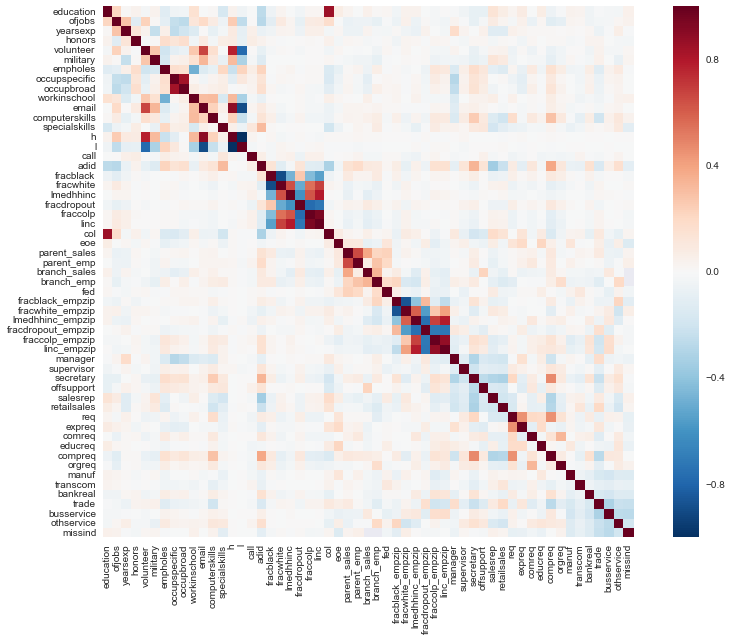

In [58]:
corrmat = data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
 
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()


<div class="span5 alert alert-info">
### ANSWERS:

   1. What test is appropriate for this problem? <b> Comparison of two proportions </b>
      Does CLT apply? <b> Yes, since np and n(1-p) where n is number of samples and p is the probability that an applicant is called, is more than 10, it can approximate the normal distribution.</b>
   2. What are the null and alternate hypotheses? <b> H<sub>o</sub>= the call back for black and non-blacks are the same  while H<sub>a</sub>= the call back for black and non-blacks are not the same  </b>
   3. Compute margin of error, confidence interval, and p-value. <b> margin of error= 0.00697820016119
conf interval= (-0.045710126525379105, -0.018355581893512069)
p-value= 2.36721263361e-25 </b>
   4. Write a story describing the statistical significance in the context or the original problem.
   <h3> Discrimination in Job Market on Black sounding names </h3>
   >  Black sounding names have 2% to 4% average less callbacks compared to non-black sounding names.
   
   >  Education, years experience and number of previous jobs have no significant difference.
   
   >  However, differences are found in honors achieved, military and volunteer work, employment holes, work in school and computer skills.
   
   There is a discrimination in the job market for black sounding names. A study of 4870 job applicants in 2000 to 2002 shows that there is a difference between the number of callbacks for black sounding names compared to non-black sounding names.  The study also shows that education, years experience and number of previous jobs are the same between the two groups.  Meanwhile, there is a difference shown in honors achieved, military and volunteer work, employment holes, work in school and computer skills.
   
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
   <b> Race is not the most important factor in callback success. In fact there are differences between black and nonblack sounding names in terms of honors achieved, military and volunteer work, employment holes, work in school and computer skills. These are the reasons why there is a difference on the callbacks between the two groups</b>


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
</div>
****